## 2d Ising Model

In [4]:
import numpy as np
from numpy import random
import ising_class as IM
import matplotlib.pyplot as plt

%matplotlib inline
from IPython.display import clear_output

In [5]:
# system parameters, as fixed by user
n = 50          # number of sites given by n x n (square)
T = 1           # temperature
nstep = 3000   # the 'time' for this dynamical evolution
dynamics = 'G'  # G : Glauber , K : Kawasaki

# initialise lattice sites
rng = random.default_rng()
lattice = random.choice(np.array([-1,1]), (n,n))

# all spin down initial lattice (ground state for Glauber)
#lattice = -np.ones((n,n))

# half up, half down configuration (ground state for Kawasaki)
#lattice = np.concatenate((np.ones((int(n/2),n)), -np.ones((int(n/2),n))), axis=0)

system = IM.IsingLattice(lattice, T)             # initial system

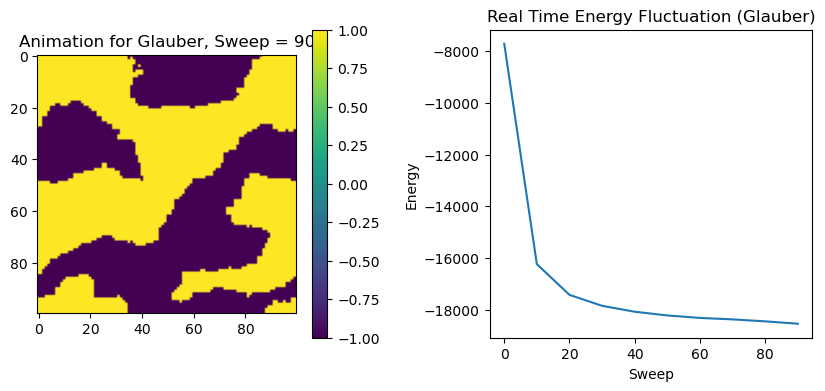

KeyboardInterrupt: 

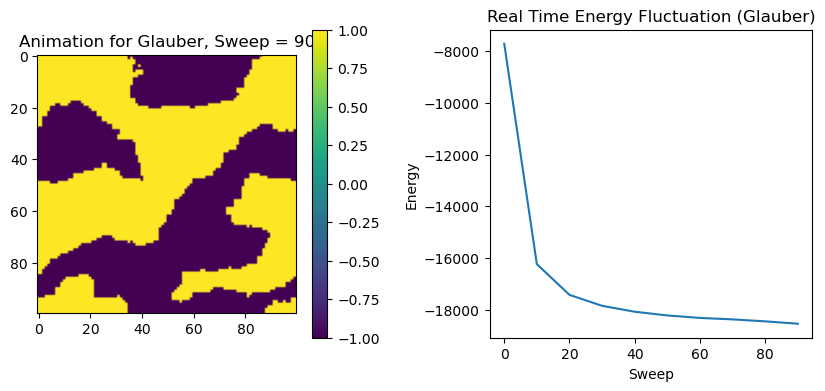

In [6]:
energy_list = []
magnetisation_list = []
time_list = []

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))
plt.subplots_adjust(wspace=0.4)
im = ax1.imshow(system.lattice, animated=True, vmin=-1, vmax=1)
fig.colorbar(im, ax=ax1)
line, = ax2.plot([], [])  # empty line plot to start

if dynamics == 'G':
    print('Simulate with Glauber dynamics.')
    print('Sweep, Energy, Magnetisation')
    for sweep in range(nstep):
        for _ in range(n**2):

            system.perform_glauber_step()

        #occasionally plot or update measurements
        if (sweep%10) == 0:
            # update measurements
            energy_list.append(system.energy)
            magnetisation_list.append(system.magnetisation)
            time_list.append(sweep)

            # show animation
            ax1.cla()
            im=ax1.imshow(system.lattice, animated=True, vmin=-1, vmax=1)
            ax1.set_title(f'Animation for Glauber, Sweep = {sweep}')

            # update states graph
            ax2.cla()  # clear the axes
            ax2.plot(time_list, energy_list)
            ax2.relim()  # recalculate limits
            ax2.autoscale_view()  # autoscale the view
            ax2.set_title(f'Real Time Energy Fluctuation (Glauber)')
            ax2.set_xlabel('Sweep')
            ax2.set_ylabel('Energy')

            clear_output(wait=True)
            display(fig)

if dynamics == 'K':
    print('Simulate with Kawasaki dynamics.')
    print('Sweep, Energy, Magnetisation')
    for sweep in range(nstep):
        for _ in range(n**2):

            system.perform_kawasaki_step()

        #occasionally plot or update measurements
        if (sweep%10) == 0:
            # update measurements
            energy_list.append(system.energy)
            magnetisation_list.append(system.magnetisation)
            time_list.append(sweep)

            # show animation
            ax1.cla()
            im=ax1.imshow(system.lattice, animated=True, vmin=-1, vmax=1)
            ax1.set_title(f'Animation for Kawasaki, Sweep = {sweep}')

            # update states graph
            ax2.cla()  # clear the axes
            ax2.plot(time_list, energy_list)
            ax2.relim()  # recalculate limits
            ax2.autoscale_view()  # autoscale the view
            ax2.set_title(f'Real Time Energy Fluctuation (Kawasaki)')
            ax2.set_xlabel('Sweep')
            ax2.set_ylabel('Energy')

            clear_output(wait=True)
            display(fig)                 